# Race Distribution of East Palo Alto

The following visualizations display the distribution of different races in East Palo Alto. Our main focus was to understand the different communities that our design for green infrastructure and stormwater management would impact. The data was collected from the US Census Bureau.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [4]:
race_file = "../data/race.csv"
race_df = pd.read_csv(race_file)
race_df

,Race,Count,ME
0,White (White),6805,1347
1,Black / African American (Black / African Amer...,3544,556
2,Aztec (American Indian and Alaska Native),716,593
3,Blackfeet Tribe of the Blackfeet Indian Reserv...,0,25
4,Maya (American Indian and Alaska Native),245,201
5,Native Village of Barrow Inupiat Traditional G...,0,25
6,Navajo Nation (American Indian and Alaska Native),0,25
7,Nome Eskimo Community (American Indian and Ala...,0,25
8,Other American Indian and Alaska Native (Ameri...,243,176
9,Indian (Asian),414,244


In [5]:
def extract_ethnicity(df):
    df['Ethnicity'] = df['Race'].str.extract(r'\((.*?)\)', expand=False)
    return df

In [6]:
# group by ethnicity
ethnicity_df = extract_ethnicity(race_df).groupby('Ethnicity').sum('Count').reset_index()
ethnicity_df['Ethnicity'] = ethnicity_df['Ethnicity'].str.replace('Race','')
ethnicity_df

,Ethnicity,Count,ME
0,American Indian and Alaska Native,1204,1070
1,Asian,1693,1270
2,Black / African American,3544,556
3,Hispanic or Latino,18104,2382
4,Native Hawaiian,1318,752
5,White,6805,1347


In [7]:
def drop_ethnicity(df):
    df['Race'] = df['Race'].str.replace(r'\s*\(.*?\)\s*', '', regex=True)
    return df

In [8]:
# drop the ethnicity in race column
race_cleaned = drop_ethnicity(race_df)
race_cleaned

,Race,Count,ME,Ethnicity
0,White,6805,1347,White
1,Black / African American,3544,556,Black / African American
2,Aztec,716,593,American Indian and Alaska Native
3,Blackfeet Tribe of the Blackfeet Indian Reserv...,0,25,American Indian and Alaska Native
4,Maya,245,201,American Indian and Alaska Native
5,Native Village of Barrow Inupiat Traditional G...,0,25,American Indian and Alaska Native
6,Navajo Nation,0,25,American Indian and Alaska Native
7,Nome Eskimo Community,0,25,American Indian and Alaska Native
8,Other American Indian and Alaska Native,243,176,American Indian and Alaska Native
9,Indian,414,244,Asian


In [16]:
merged_df = race_cleaned.merge(ethnicity_df, on="Ethnicity")
merged_df = merged_df.drop(["ME_x", "ME_y"], axis=1)
merged_df = merged_df.rename(columns={"Count_x": "Race Count", "Count_y": "Ethnicity Count"})
merged_df

,Race,Race Count,Ethnicity,Ethnicity Count
0,White,6805,White,6805
1,Black / African American,3544,Black / African American,3544
2,Aztec,716,American Indian and Alaska Native,1204
3,Blackfeet Tribe of the Blackfeet Indian Reserv...,0,American Indian and Alaska Native,1204
4,Maya,245,American Indian and Alaska Native,1204
5,Native Village of Barrow Inupiat Traditional G...,0,American Indian and Alaska Native,1204
6,Navajo Nation,0,American Indian and Alaska Native,1204
7,Nome Eskimo Community,0,American Indian and Alaska Native,1204
8,Other American Indian and Alaska Native,243,American Indian and Alaska Native,1204
9,Indian,414,Asian,1693


In [47]:
sunburst = px.sunburst(
    merged_df,
    path=['Ethnicity', 'Race'],
    values='Race Count',
    title='Race and Ethnicity Distribution',
    color_discrete_sequence=px.colors.qualitative.Dark2
)

sunburst.update_layout(
    width=800,  
    height=800  
)

sunburst.show()

In [53]:
# create dfs for each ethnicity
def create_eth_df(df, ethnicity):
    eth_df =  df[df['Ethnicity'] == ethnicity]
    return eth_df

/var/folders/jz/tmg5mxd9661fqkvv1hfktc6w0000gn/T/ipykernel_20694/1149316339.py:11: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



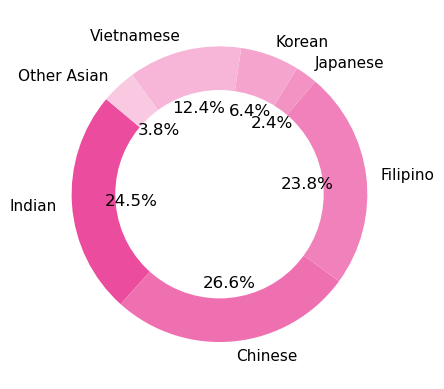

In [ ]:
# center white to make it a donut
center_white = plt.Circle( (0,0), 0.7, color='white')

# asian chart
asian_df = create_eth_df(merged_df, 'Asian')
asian_colors = ['#eb4c9d', '#ef70b1', '#f181ba', '#f393c4', '#f5a4ce', '#f7b6d7', '#f9c8e1', '#fbd9ea']
asian_pie = plt.pie(asian_df['Race Count'], labels=asian_df['Race'], colors=asian_colors, autopct='%1.1f%%', startangle=140)
asian_plt = plt.gcf()
asian_plt.gca().add_artist(center_white)

asian_plt.show()

/var/folders/jz/tmg5mxd9661fqkvv1hfktc6w0000gn/T/ipykernel_20694/3657917690.py:10: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



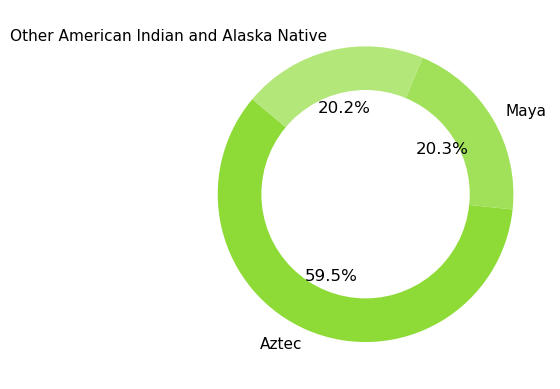

In [83]:
# american indian chart
indig_df = create_eth_df(merged_df, 'American Indian and Alaska Native')
indig_df = indig_df[indig_df['Race Count'] > 0]
indig_colors = ['#8edb38', '#a1e159', '#b4e77a', '#c6ed9b']
indig_pie = plt.pie(indig_df['Race Count'], labels=indig_df['Race'], colors=indig_colors, autopct='%1.1f%%', startangle=140)
indig_plt = plt.gcf()
center_white = plt.Circle( (0,0), 0.7, color='white')
indig_plt.gca().add_artist(center_white)

indig_plt.show()